In [30]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
import cvxpy as cvx
import os

from util import *
from data_loader import * 
from module_deconv import *
from module_exp import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Simulation experiments for 1d case#
 - Distrbution estimation 
 - Moments estimation: estimating the first k moments/ mean/ variances, etc. 
 - Denoising 
<br> Here, we assume that we know the support $x$ as well as the sequencing depth $N_r$. The software support two noise models: the poisson model and the binomial model.

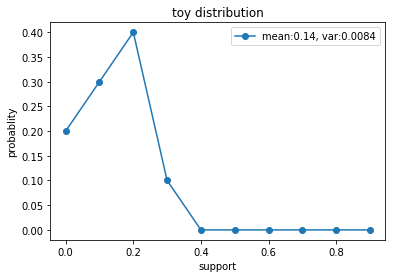

In [23]:
## creating a toy 1d distribution instance
np.random.seed(42)
p,x=toy_dist(vis=1)
## generate the simulated read count data
N_c=100000
N_r=10
Y_pdf,Y_supp,X,Y=data_gen_1d(p,x,N_c,N_r,noise='poi',return_data=1)

### 1. Distribution estimation ###

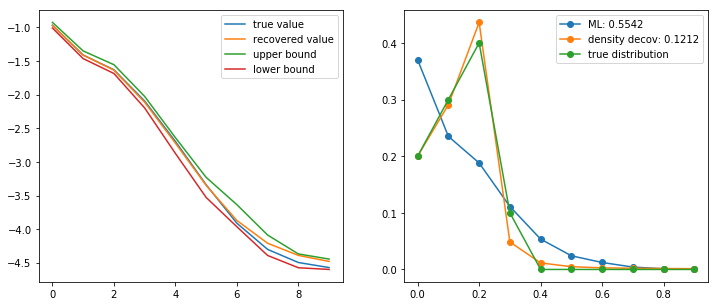

In [6]:
## distribution estimation
p_hat,dd_info=deconv_1d(Y_pdf,Y_supp,x,N_c,N_r,noise='poi',opt='dd')
_=plot_dd_result(p,p_hat,dd_info)

### 2. Moments estimation ###

In [25]:
mean_hat,var_hat,M_hat = dd_moments_1d(Y_pdf,Y_supp,x,N_c,N_r,k=2,noise='bin')
print mean_hat,var_hat,M_hat

0.140142 0.00848577539156 [ 0.140142    0.02812556]


### 3. Denoising ### 

In [5]:
## denoising
print 'Empirical estimate MSE:',np.linalg.norm(X-Y/(N_r+0.0))**2/(N_c+0.0)
x_hat_bayes=denoise_1d(Y,N_r,x,p=p)
print 'Bayes estimate MSE:',np.linalg.norm(X-x_hat_bayes)**2/(N_c+0.0)
x_hat_eb=denoise_1d(Y,N_r,x)
print 'EB estimate MSE:',np.linalg.norm(X-x_hat_eb)**2/(N_c+0.0)

Empirical Estimate MSE: 0.01417
Bayes Estimate MSE: 0.0045008484331
EB Estimate MSE: 0.00478396933035


### 4. Experiments with parameter sweeping ###

In [26]:
output_folder='./simu_1d'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [34]:
np.random.seed(42)
param_list=[]
for B in [1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5,5e5,1e6,2e6,5e6]:
    for N_r in np.linspace(2,100,25,dtype=int):
        N_c=np.max([int(B/(N_r+0.0)),1])
        param_list.append([N_c,N_r,int(B)])
param_list=np.array(param_list)
rep_time=2
p,x=toy_dist(vis=1)

In [12]:
res_dd,res_ml=simu_dd(p,x,param_list,rep_time,output_folder)

(300, 1000)